<CENTER>
<img src="https://secure.meetupstatic.com/photos/theme_head/d/9/1/7/full_7435575.jpeg" width="100%">

  <header>
    <h1>Introducció a Pandas</h1>
    <h3>12 Juliol 2017</h3>
    <h2>@victormartin</h2>
    <p></p>
  </header>
</CENTER>


# Contingut d'aquesta xerrada

- Per què necessites pandas?
- Introducció bàsica a les estructures de dades
- Exemples d'algunes funcionalitats de pandas amb dades del **portal Girona Open Data** http://www.girona.cat/opendata

Material original de Joris Van den Bossche https://github.com/jorisvandenbossche/2015-PyDataParis

Per veure aquest notebook en format de presentació (Reveal.js):

```
$ipython nbconvert pandas_introduction.ipynb --to slides --post serve
```

Alguns imports:

In [71]:
%matplotlib inline

import pandas as pd
import numpy as np

import os
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (16, 6)

import seaborn

# Primer una petita demostració

## Case study: Padró Municipal Girona 2015

Al portal Girona Open Data podem trobar les dades del padró municipal de Girona

In [2]:
from IPython.display import HTML
HTML('<iframe src=http://www.girona.cat/opendata/ width=1024 height=350></iframe>')

In [3]:
data_folder = os.path.join(os.getcwd(), 'data')
data = pd.read_csv(
    os.path.join(data_folder, '2015-padro.csv'), 
    sep=';', 
    parse_dates=["data_naixement", "data_alta"])

In [4]:
data.sample(3)

,districte,seccio,sexe,codi_nivell_estudis,nivell_estudis,data_naixement,codi_municipi_naixement,municipi_pais_naixement,codi_provincia_naixement,provincia_naixement,codi_nacionalitat,nacionalitat,data_alta,codi_municipi_procedencia,municipi_pais_procedencia,codi_provincia_procedencia,provincia_procedencia
98202,6,4,DONA,0,NO APLICABLE MENOR 16,2009-01-01,079,GIRONA,17,GIRONA,108,ESPAÑA,2009-10-18,079,GIRONA,17.0,GIRONA
48900,3,12,DONA,20,PRIMÀRIA INCOMPLETA,1937-01-01,074,LLERENA,6,BADAJOZ,108,ESPAÑA,1996-01-05,074,LLERENA,6.0,BADAJOZ
71083,3,5,HOME,42,"BATXILLER SUPERIOR, BUP",1997-01-01,079,GIRONA,17,GIRONA,108,ESPAÑA,2000-06-16,025,BORDILS,17.0,GIRONA


Obtenir respostes a preguntes sobre aquestes dades amb molt poques línees de codi:

**Quina edat tenen els seus habitants?**



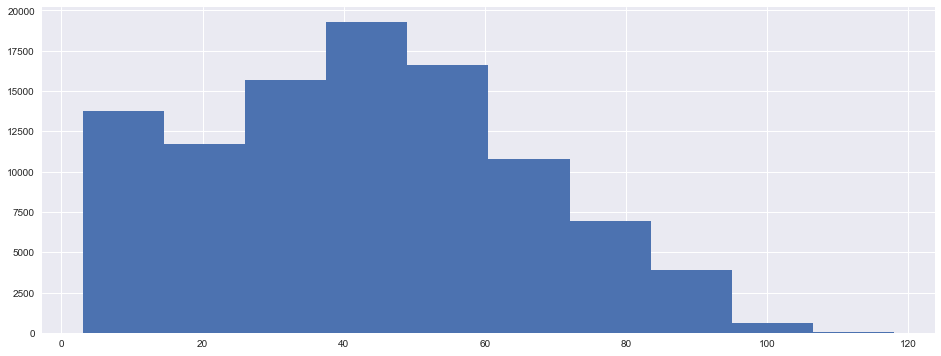

In [73]:
((datetime.now() - data["data_naixement"]).dt.days / 365).round(0).hist()

**De on venen els nous ciutadans de Girona?**

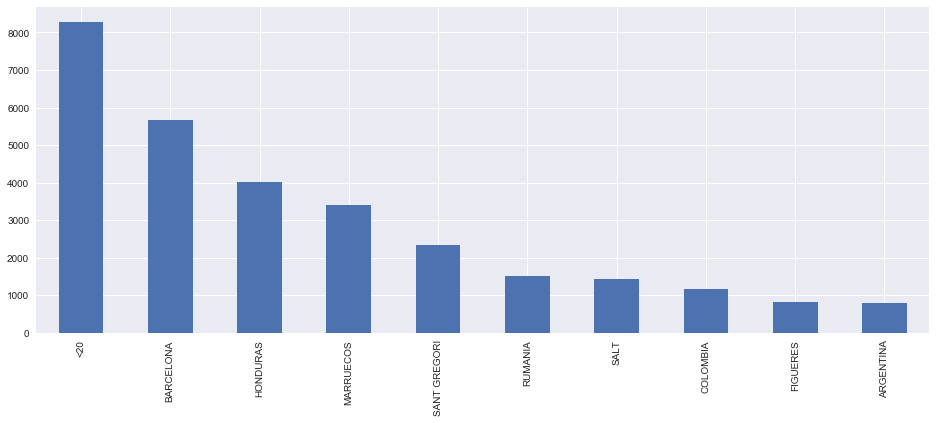

In [74]:
data[data["municipi_pais_naixement"]!="GIRONA"]["municipi_pais_naixement"].value_counts().head(10).plot.bar()

**Quina es la evolució de l'arribada de estrangers?**

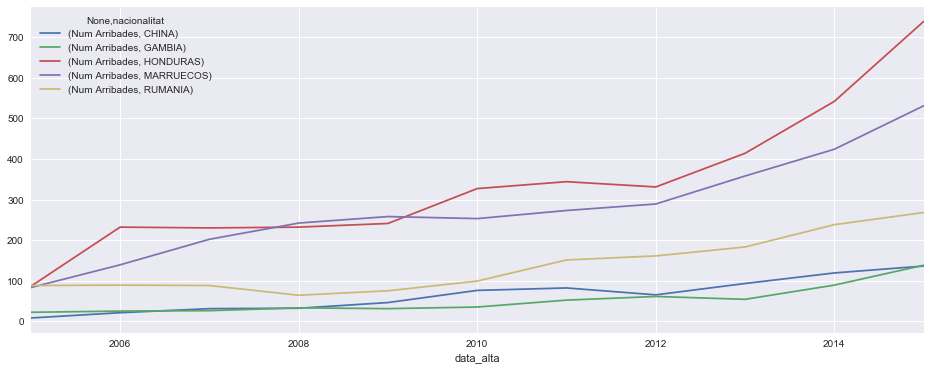

In [75]:
estrangers = data[data["nacionalitat"]!="ESPAÑA"]
estrangers_any = estrangers.groupby([estrangers["data_alta"].dt.year,"nacionalitat"]).size().to_frame("Num Arribades").unstack("nacionalitat").fillna(0)
#estrangers_any.sum().sort_values(ascending=False).head(5)
estrangers_any.loc[2005:,pd.IndexSlice[:,["HONDURAS","MARRUECOS","RUMANIA","CHINA","GAMBIA"]]].plot()

Tornarem a les dades del padró, i veurem pas a pas com treballar-hi amb pandas

# Per què necessites pandas?

## Per què necessites pandas?

Quan treballes amb *dades tabulars o estructurades* (com R dataframes, taules SQL, fulls de càlcul Excel, ...):

- Importar dades
- Netejar-les
- Primera exploració
- Processarles per al seu anàlisis
- Analitzarles (juntament scikit-learn, statsmodels, ...) 

(Spoiler Intro to data science ;) )

# Pandas: anàlisis de dades en python

Per processament de dades en Python, la llibrería [Pandas](http://pandas.pydata.org) ha esdevingut essencial.

Què és ``pandas``?

* Pots pensar en Pandas com arrays NumPy amb etiquetes per files i columnes, i un millor suport per a tipus de dades heterogenis... però es molt més que això 
* També pots pensar en Pandas com els `data.frame` de `R` però per a Python.
* Molt potent per treballar amb missing data, treballar amb sèries temporals, per llegir i escriure les dades, per canviar la seva forma, agrupar, fusionar, etc.,

Documentació: http://pandas.pydata.org/pandas-docs/stable/

## Features principals

* Suport fàcil, ràpid i flexible per a multitud de formats de dades
* Mètodes per treballar amb missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Manipulació potent de sèries temporals (resampling, timezones, ..)
* Fàcil visualització en forma de gràfics

# Estructures de dades bàsiques

Pandas fa tot això amb dos tipus d'objectes, construits sobre arrays de Numpy: l'objecte ``Series``, i l'objecte ``DataFrame``.

## Series

Series bàsicament es un contenidor per **dades uni-dimensionals etiquetades**. Es pot instanciar de la mateixa manera que els arrays NumPy:

In [8]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Atributs de Series: `index` i `values`

Series incorpora el concepte de un **index**, el cual per defecte son nombres enters de *0* a *N - 1*

In [9]:
s.index

RangeIndex(start=0, stop=4, step=1)

Pots accedir a la representació internta del array numpy amb l'atribut `.values`:

In [10]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

Podem accedir als valors de la serie fent servir l'index, com en els arrays de Numpy::

In [11]:
s[0]

0.10000000000000001

Però a diferència dels arrays de Numpy, aquest index pot ser un altra cosa que no siguin nombres enters:

In [12]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [13]:
s2['c']

2

D'aquesta manera, pots pensar en un objecte ``Series`` com una cosa similar a un ```SortedDictionary<K,V>```:

In [14]:
poblacio = pd.Series({'Barcelona': 5.518430, 'Girona': 0.741308, 'Lleida': 0.427208, 'Tarragona': 0.790185})
poblacio

Barcelona    5.518430
Girona       0.741308
Lleida       0.427208
Tarragona    0.790185
dtype: float64

In [15]:
poblacio['Girona']

0.74130799999999997

pero amb la potència dels arrays numpy:

In [16]:
poblacio * 1000000

Barcelona    5518430.0
Girona        741308.0
Lleida        427208.0
Tarragona     790185.0
dtype: float64

Podem indexar i seleccionar les Series:

In [17]:
poblacio['Girona']

0.74130799999999997

In [18]:
poblacio['Girona':'Tarragona']

Girona       0.741308
Lleida       0.427208
Tarragona    0.790185
dtype: float64

Moltes de les coses que podem fer amb arrays numpy, poden ser aplicades també als objectes.

Fancy indexing, seleccionar objectes de l'índex a través de llists o booleans:

In [19]:
poblacio[['Girona', 'Lleida']]

Girona    0.741308
Lleida    0.427208
dtype: float64

In [20]:
poblacio[poblacio < 1]

Girona       0.741308
Lleida       0.427208
Tarragona    0.790185
dtype: float64

Operacions element a element:

In [21]:
poblacio * 1000000

Barcelona    5518430.0
Girona        741308.0
Lleida        427208.0
Tarragona     790185.0
dtype: float64

Un munt de mètodes:

In [22]:
poblacio.mean()

1.8692827500000002

### Alineació!

Pren atenció a l'**alineació**: les operacions entre series seràn alineades fent servir l'índex:

In [23]:
s1 = poblacio[['Barcelona', 'Girona']]
s2 = poblacio[['Girona', 'Tarragona']]

In [24]:
s1

Barcelona    5.518430
Girona       0.741308
dtype: float64

In [25]:
s2

Girona       0.741308
Tarragona    0.790185
dtype: float64

In [26]:
s1 + s2

Barcelona         NaN
Girona       1.482616
Tarragona         NaN
dtype: float64

## DataFrames: Multi-dimensional Data

Un DataFrame es una **estructura de dades tabular** (objecte multi-dimensional que conté dades etiquetades) format per files i columnes. Similar a fulls de càlculs, taules de bases de dades relacionals, etc.,. 

Multiples objectes Series que comparteixen el mateix índex






Una de les formes més comunes de crear un dataframe es a partir de un diccionari de arrays o llistes.

Als notebooks, el dataframe es mostra en format HTML:

In [27]:
dades = {'provincia': ['Barcelona', 'Girona', 'Lleida', 'Tarragona'],
        'habitants': [5.518430, 0.74130, 0.427208, 0.790185],
        'superficie': [7733, 5905, 12172, 6302],
        'muntanya mes alta': ['Costa Cabriolera', 'Puig Pedros', "Pica d'estats", 'Caro']}
provincies = pd.DataFrame(dades)
provincies

,habitants,muntanya mes alta,provincia,superficie
0,5.518430,Costa Cabriolera,Barcelona,7733
1,0.741300,Puig Pedros,Girona,5905
2,0.427208,Pica d'estats,Lleida,12172
3,0.790185,Caro,Tarragona,6302


### Atributs de DataFrame

A més de l'atribut `index`, DataFrame té l'atribut `columns`:

In [28]:
provincies.index

RangeIndex(start=0, stop=4, step=1)

In [29]:
provincies.columns

Index([u'habitants', u'muntanya mes alta', u'provincia', u'superficie'], dtype='object')

Per veure els tipus de dades de les diferents columnes:

In [30]:
provincies.dtypes

habitants            float64
muntanya mes alta     object
provincia             object
superficie             int64
dtype: object

Un resum d'aquesta informació es pot veure amb el mètode `info()`:

In [31]:
provincies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
habitants            4 non-null float64
muntanya mes alta    4 non-null object
provincia            4 non-null object
superficie           4 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 200.0+ bytes


El DataFrame també té l'atribut `values`, pero atenció: quan tens dades heterogènies, els valors seràn "upcasted":

In [32]:
provincies.values

array([[5.51843, 'Costa Cabriolera', 'Barcelona', 7733],
       [0.7413, 'Puig Pedros', 'Girona', 5905],
       [0.427208, "Pica d'estats", 'Lleida', 12172],
       [0.790185, 'Caro', 'Tarragona', 6302]], dtype=object)

Si no t'agrada l'index, podem resetejarlo a qualsevol de les nostres columnes:

In [33]:
provincies = provincies.set_index('provincia')
provincies

,habitants,muntanya mes alta,superficie
provincia,,,
Barcelona,5.518430,Costa Cabriolera,7733
Girona,0.741300,Puig Pedros,5905
Lleida,0.427208,Pica d'estats,12172
Tarragona,0.790185,Caro,6302


Podem accedir a l'objecte Series que representa cada columna:

In [34]:
provincies['superficie']

provincia
Barcelona     7733
Girona        5905
Lleida       12172
Tarragona     6302
Name: superficie, dtype: int64

A mesura que experimentes amb DataFrames, aviat et donaràs compte que moltes de les operacions que funciones amb arrays NumPy també funcionen amb DataFrames:

Calculem la densitat de població de cada província (hab/km²):

In [35]:
(provincies['habitants']*1000000 / provincies['superficie']).round(2)

provincia
Barcelona    713.62
Girona       125.54
Lleida        35.10
Tarragona    125.39
dtype: float64

Afegir una columna nova al dataframe és molt simple:

In [36]:
provincies['densitat'] = provincies['habitants']*1000000 / provincies['superficie']
provincies

,habitants,muntanya mes alta,superficie,densitat
provincia,,,,
Barcelona,5.518430,Costa Cabriolera,7733,713.620846
Girona,0.741300,Puig Pedros,5905,125.537680
Lleida,0.427208,Pica d'estats,12172,35.097601
Tarragona,0.790185,Caro,6302,125.386385


Podem utilitzar masking per seleccionar dades:

In [37]:
provincies[provincies['densitat'] > 100]

,habitants,muntanya mes alta,superficie,densitat
provincia,,,,
Barcelona,5.518430,Costa Cabriolera,7733,713.620846
Girona,0.741300,Puig Pedros,5905,125.537680
Tarragona,0.790185,Caro,6302,125.386385


Podem ordenar el dataframe per un camp:

In [38]:
provincies.sort_values(by='densitat', ascending=True)

,habitants,muntanya mes alta,superficie,densitat
provincia,,,,
Lleida,0.427208,Pica d'estats,12172,35.097601
Tarragona,0.790185,Caro,6302,125.386385
Girona,0.741300,Puig Pedros,5905,125.537680
Barcelona,5.518430,Costa Cabriolera,7733,713.620846


Un mètode molt pràctic es ``describe``, que calcula estadístiques de cada columna:

In [39]:
provincies.describe()

,habitants,superficie,densitat
count,4.000000,4.000000,4.000000
mean,1.869281,8028.000000,249.910628
std,2.438077,2872.047237,312.061276
min,0.427208,5905.000000,35.097601
25%,0.662777,6202.750000,102.814189
50%,0.765742,7017.500000,125.462033
75%,1.972246,8842.750000,272.558471
max,5.518430,12172.000000,713.620846


Amb el mètode `plot` podem visualitzar fàcilment les dades de diferent maneres:

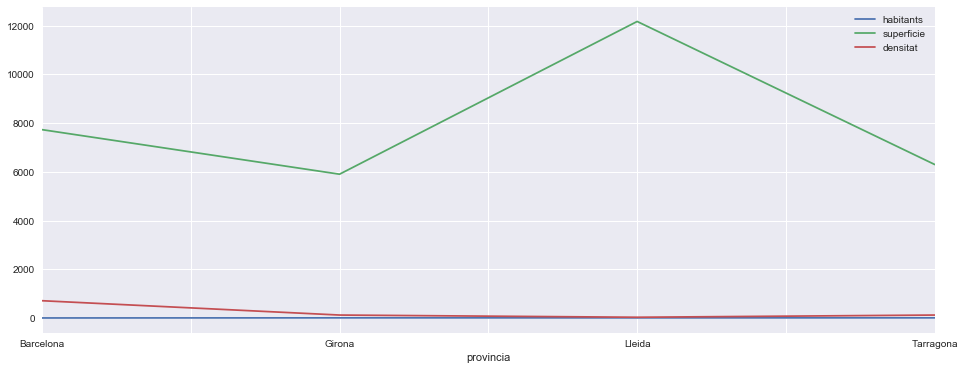

In [76]:
provincies.plot()

Per aquest conjunt de dades no diu gaire.

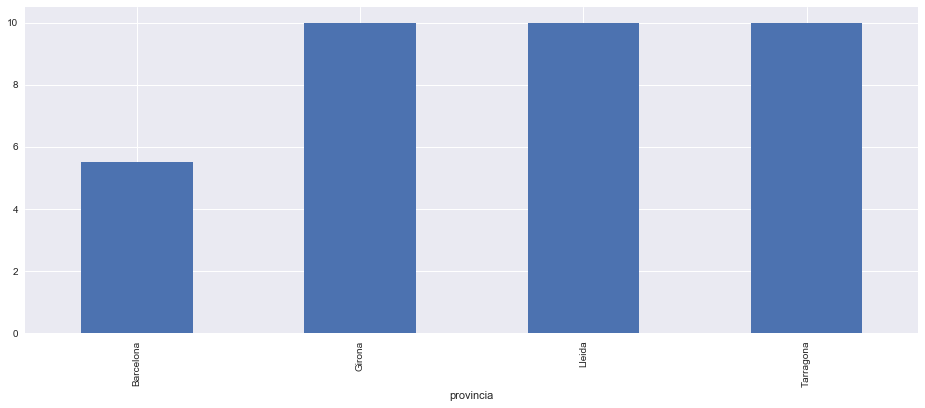

In [77]:
provincies['habitants'].plot(kind='bar')

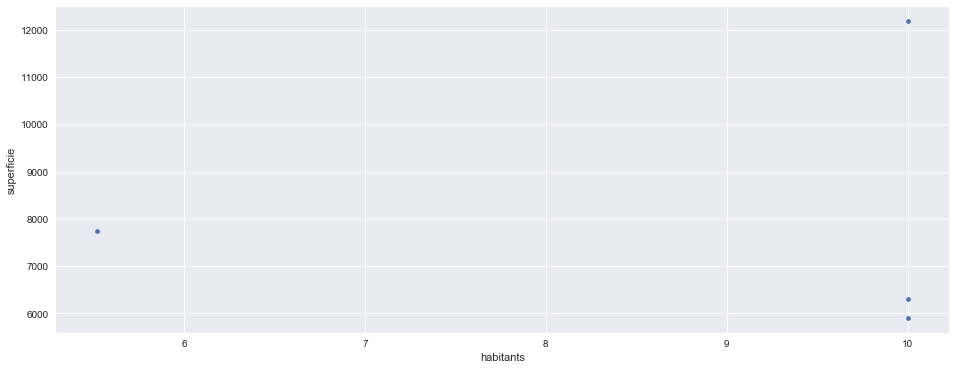

In [78]:
provincies.plot(kind='scatter', x='habitants', y='superficie')

Els tipus de gràfics disponibles són: ‘line’ (per defecte), ‘bar’, ‘barh’, ‘hist’, ‘box’ , ‘kde’, ‘area’, ‘pie’, ‘scatter’, ‘hexbin’.



## Algunes notes sobre seleccionar dades

Una de les funcionalitats bàsiques de pandas és l'etiquetat de files i columnes, però això fa una mica més complexe l'indexat en comparació a numpy. Ara hem de diferenciar entre:

- selecció per etiqueta
- selecció per posició

Per un DataFrame, la indexació bàsica selecciona les columnes:

Seleccionar una columna:

In [43]:
provincies['superficie']

provincia
Barcelona     7733
Girona        5905
Lleida       12172
Tarragona     6302
Name: superficie, dtype: int64

o múltiples columnes:

In [44]:
provincies[['superficie', 'densitat']]

,superficie,densitat
provincia,,
Barcelona,7733,713.620846
Girona,5905,125.537680
Lleida,12172,35.097601
Tarragona,6302,125.386385


L'slicing accedeix a les files:

In [45]:
provincies['Girona':'Tarragona']

,habitants,muntanya mes alta,superficie,densitat
provincia,,,,
Girona,0.741300,Puig Pedros,5905,125.537680
Lleida,0.427208,Pica d'estats,12172,35.097601
Tarragona,0.790185,Caro,6302,125.386385


Per un indexat més avançat, tenim atributs extra:
    
* `loc`: selecció per etiqueta
* `iloc`: selecció per posició

In [46]:
provincies.loc['Girona', 'superficie']

5905

In [47]:
provincies.loc['Girona':'Tarragona', :]

,habitants,muntanya mes alta,superficie,densitat
provincia,,,,
Girona,0.741300,Puig Pedros,5905,125.537680
Lleida,0.427208,Pica d'estats,12172,35.097601
Tarragona,0.790185,Caro,6302,125.386385


In [48]:
provincies.loc[provincies['densitat']>300, ['muntanya mes alta', 'habitants']]

,muntanya mes alta,habitants
provincia,,
Barcelona,Costa Cabriolera,5.51843


Seleccionar per posició fent servir `iloc` funciona de forma molt similar als arrays numpy:

In [49]:
provincies.iloc[0:2,1:3]

,muntanya mes alta,superficie
provincia,,
Barcelona,Costa Cabriolera,7733
Girona,Puig Pedros,5905


Els diferents mètodes de indexació s'utilitzen també per assignar dades:

In [50]:
provincies.loc['Girona':'Tarragona', 'habitants'] = 10

In [51]:
provincies

,habitants,muntanya mes alta,superficie,densitat
provincia,,,,
Barcelona,5.51843,Costa Cabriolera,7733,713.620846
Girona,10.00000,Puig Pedros,5905,125.537680
Lleida,10.00000,Pica d'estats,12172,35.097601
Tarragona,10.00000,Caro,6302,125.386385


Hi ha moltíssimes més operacions molt interessants que es poden fer amb els objectes Series i DataFrame, però en comptes de continuar amb aquestes dades de joguina, continuarem amb un exemple real, que ens serviràn per ilustrar alguns conceptes més avançats.

# Cas real: Cens de la ciutat de Girona de 2015

# Importar i netejar les dades

## Importar/Exportar dades amb pandas

pandas suporta de forma nativa un grapat de formats:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

## Per al nostre cas real

He descarregat un CSV amb el padró de 2015 de la ciutat de girona, i l'he inclòs al repo

In [80]:
data_folder = os.path.join(os.getcwd(), 'data')
data = pd.read_csv(
    os.path.join(data_folder, '2015-padro.csv'), 
    sep=';', 
    parse_dates=["data_naixement", "data_alta"])

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99374 entries, 0 to 99373
Data columns (total 17 columns):
districte                     99374 non-null int64
seccio                        99374 non-null int64
sexe                          99374 non-null object
codi_nivell_estudis           99374 non-null int64
nivell_estudis                99374 non-null object
data_naixement                99373 non-null datetime64[ns]
codi_municipi_naixement       99374 non-null object
municipi_pais_naixement       99374 non-null object
codi_provincia_naixement      99374 non-null int64
provincia_naixement           99374 non-null object
codi_nacionalitat             99374 non-null object
nacionalitat                  99374 non-null object
data_alta                     99374 non-null datetime64[ns]
codi_municipi_procedencia     96026 non-null object
municipi_pais_procedencia     96026 non-null object
codi_provincia_procedencia    96032 non-null float64
provincia_procedencia         96032 non-null o

Ens carreguem les columnes que començen per codi

In [82]:
data = data.drop([col for col in data.columns.values if col.startswith('codi_')], axis=1)

# Explorant les dades

Alguns mètodes interessants:

`head` and `tail`

In [83]:
data.head(3)

,districte,seccio,sexe,nivell_estudis,data_naixement,municipi_pais_naixement,provincia_naixement,nacionalitat,data_alta,municipi_pais_procedencia,provincia_procedencia
0,1,1,HOME,NO APLICABLE MENOR 16,2000-01-01,GIRONA,GIRONA,ESPAÑA,2000-08-14,GIRONA,GIRONA
1,1,1,DONA,"BATXILLER SUPERIOR, BUP",1944-01-01,ARGENTINA,EXTRANJERO,ITALIA,2002-11-21,MATARO,BARCELONA
2,1,1,HOME,"BATXILLER SUPERIOR, BUP",1979-01-01,ARGENTINA,EXTRANJERO,ITALIA,2011-12-05,GIRONA,GIRONA


`info()`

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99374 entries, 0 to 99373
Data columns (total 11 columns):
districte                    99374 non-null int64
seccio                       99374 non-null int64
sexe                         99374 non-null object
nivell_estudis               99374 non-null object
data_naixement               99373 non-null datetime64[ns]
municipi_pais_naixement      99374 non-null object
provincia_naixement          99374 non-null object
nacionalitat                 99374 non-null object
data_alta                    99374 non-null datetime64[ns]
municipi_pais_procedencia    96026 non-null object
provincia_procedencia        96032 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.3+ MB


Visualitzar ràpidament les dades

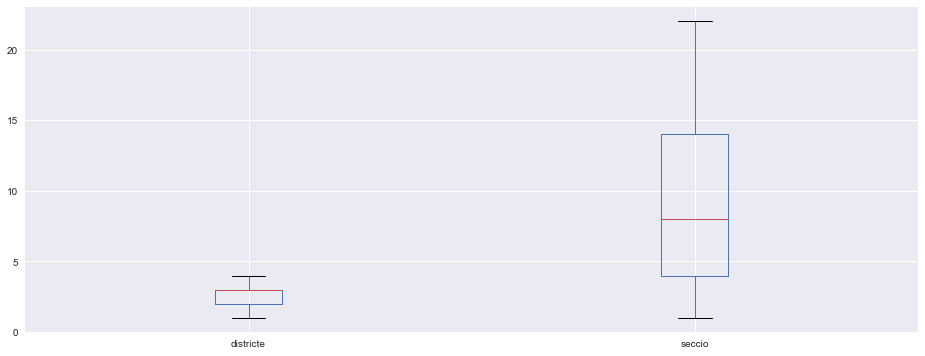

In [85]:
 data.plot(kind='box')

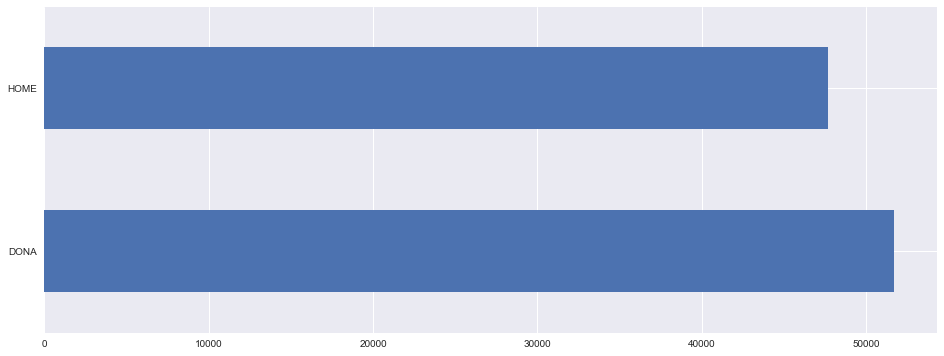

In [86]:
data['sexe'].value_counts().plot(kind='barh')

## Treballant amb time series

Quan el DataFrame conté un `DatetimeIndex`, s'habilita la funcionalitat relacionada amb time-series:

In [88]:
data = data.set_index("data_alta").sort_index()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99374 entries, 1977-09-24 to 2015-12-31
Data columns (total 10 columns):
districte                    99374 non-null int64
seccio                       99374 non-null int64
sexe                         99374 non-null object
nivell_estudis               99374 non-null object
data_naixement               99373 non-null datetime64[ns]
municipi_pais_naixement      99374 non-null object
provincia_naixement          99374 non-null object
nacionalitat                 99374 non-null object
municipi_pais_procedencia    96026 non-null object
provincia_procedencia        96032 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 8.3+ MB


Indexar un time series funciona amb strings:

In [90]:
data['2010-01-01':'2010-12-31']

,districte,seccio,sexe,nivell_estudis,data_naixement,municipi_pais_naixement,provincia_naixement,nacionalitat,municipi_pais_procedencia,provincia_procedencia
data_alta,,,,,,,,,,
2010-01-02,6,5,HOME,"ESO, PRIMÀRIA O EQUIV.",1970-01-01,MARRUECOS,EXTRANJERO,MARRUECOS,GIRONA,GIRONA
2010-01-02,2,11,DONA,"ESO, PRIMÀRIA O EQUIV.",1978-01-01,VIC,BARCELONA,ESPAÑA,<20,BARCELONA
2010-01-02,3,12,HOME,SENSE ESTUDIS,1962-01-01,GAMBIA,EXTRANJERO,GAMBIA,GIRONA,GIRONA
2010-01-02,2,11,HOME,"ESO, PRIMÀRIA O EQUIV.",1983-01-01,LLEIDA,LLEIDA,ESPAÑA,LLEIDA,LLEIDA
2010-01-02,2,17,DONA,SENSE ESTUDIS,1971-01-01,GAMBIA,EXTRANJERO,GAMBIA,SALT,GIRONA
2010-01-02,3,17,HOME,NO APLICABLE MENOR 16,2007-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA
2010-01-02,2,19,DONA,"BATXILLER SUPERIOR, BUP",1975-01-01,BARCELONA,BARCELONA,ESPAÑA,SANT JOAN DESPI,BARCELONA
2010-01-02,3,10,DONA,NO APLICABLE MENOR 16,2010-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA
2010-01-02,2,11,HOME,NO APLICABLE MENOR 16,2010-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA


Una funcionalitat interessant es la indexació "partial string", on podem seleccionar rangs a partir de un datetime string.

Ex: Habitants inscrits durant el 2012

In [91]:
data['2012']

,districte,seccio,sexe,nivell_estudis,data_naixement,municipi_pais_naixement,provincia_naixement,nacionalitat,municipi_pais_procedencia,provincia_procedencia
data_alta,,,,,,,,,,
2012-01-01,6,2,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,NaN,NaN
2012-01-02,2,21,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA
2012-01-02,2,11,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA
2012-01-02,3,4,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,NaN,NaN
2012-01-02,3,12,HOME,"ESO, PRIMÀRIA O EQUIV.",1985-01-01,GIRONA,GIRONA,ESPAÑA,CELRÀ,GIRONA
2012-01-02,3,11,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,NaN,NaN
2012-01-03,3,14,DONA,"BATXILLER SUPERIOR, BUP",1932-01-01,URUGUAY,EXTRANJERO,URUGUAY,BLANES,GIRONA
2012-01-03,3,15,DONA,FP 1ER GRAU O MITJÀ,1953-01-01,S. MIQUEL CAMPMAJOR,GIRONA,ESPAÑA,GIRONA,GIRONA
2012-01-03,3,8,HOME,NO APLICABLE MENOR 16,2007-01-01,MARRUECOS,EXTRANJERO,MARRUECOS,SALT,GIRONA


O tots els habitants inscrits de Gener a Març de 2012:

In [92]:
data['2012-01':'2012-03']

,districte,seccio,sexe,nivell_estudis,data_naixement,municipi_pais_naixement,provincia_naixement,nacionalitat,municipi_pais_procedencia,provincia_procedencia
data_alta,,,,,,,,,,
2012-01-01,6,2,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,NaN,NaN
2012-01-02,2,21,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA
2012-01-02,2,11,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,GIRONA,GIRONA
2012-01-02,3,4,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,NaN,NaN
2012-01-02,3,12,HOME,"ESO, PRIMÀRIA O EQUIV.",1985-01-01,GIRONA,GIRONA,ESPAÑA,CELRÀ,GIRONA
2012-01-02,3,11,DONA,NO APLICABLE MENOR 16,2012-01-01,GIRONA,GIRONA,ESPAÑA,NaN,NaN
2012-01-03,3,14,DONA,"BATXILLER SUPERIOR, BUP",1932-01-01,URUGUAY,EXTRANJERO,URUGUAY,BLANES,GIRONA
2012-01-03,3,15,DONA,FP 1ER GRAU O MITJÀ,1953-01-01,S. MIQUEL CAMPMAJOR,GIRONA,ESPAÑA,GIRONA,GIRONA
2012-01-03,3,8,HOME,NO APLICABLE MENOR 16,2007-01-01,MARRUECOS,EXTRANJERO,MARRUECOS,SALT,GIRONA


Els components de Hora i Data són accessibles desde l'index:

In [93]:
data.index.month

array([ 9,  1,  1, ..., 12, 12, 12], dtype=int32)

In [94]:
data.index.year

array([1977, 1996, 1996, ..., 2015, 2015, 2015], dtype=int32)

## La potència de pandas: `resample`

Un mètode molt potent es **`resample`: convertir la frecuència del time series** (per exemple de dades diaries a dades mensuals).

Aquest time series té una frecuencia diària: Vull canviar-ho a mensual:

In [95]:
data.resample('M').size().tail().to_frame("nous inscrits")

,nous inscrits
data_alta,
2015-08-31,573
2015-09-30,785
2015-10-31,739
2015-11-30,554
2015-12-31,564


Exemples de exploració de dades:

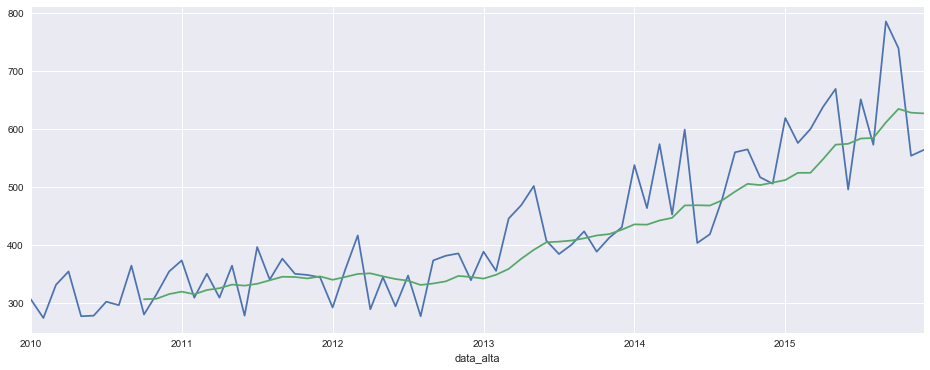

In [96]:
data['2010':].resample('M').size().plot()
data['2010':].resample('M').size().rolling(10).mean().plot()

# Analitzant les dades

## La operació groupby (split-apply-combine)

Per "group by" ens referim al procés que inclou un o més dels següents passos:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure


Similar a SQL `GROUP BY`

In [68]:
data_folder = os.path.join(os.getcwd(), 'data')
data = pd.read_csv(
    os.path.join(data_folder, '2015-padro.csv'), 
    sep=';', 
    parse_dates=["data_naixement", "data_alta"])

**Pregunta: Quines promocions son les millors formades?**

Primer afegim una columna universitari si/no

In [69]:
titulacio_universitaria_o_superior = [
    "LLICENCIAT O GRAU UNIVER.",
    "DIPLOMAT ESCOLA UNIVERS.",
    "DOCTORAT I POST-GRAU",
    "ARQUITECTE,ENGINYER T\xc3\x88CNI"
]
data["universitari"]=False
data.loc[data["nivell_estudis"].isin(titulacio_universitaria_o_superior), "universitari"]=True

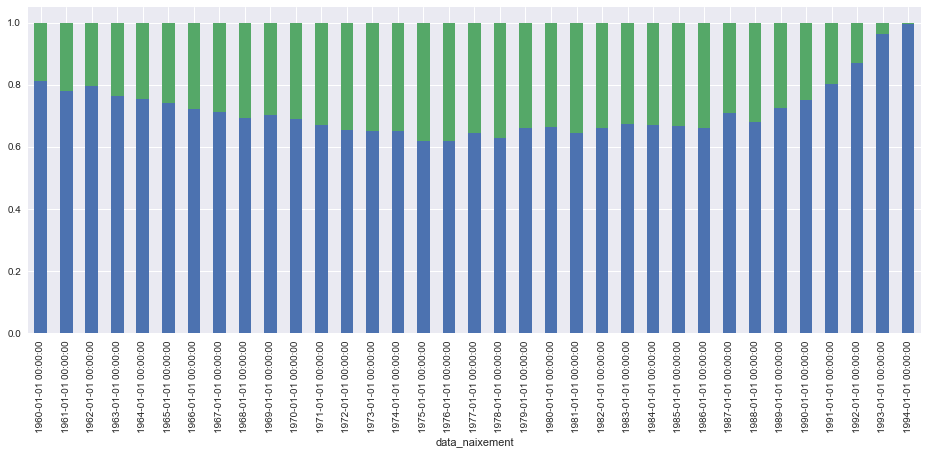

In [72]:
mask = (data["nivell_estudis"]!="NO APLICABLE MENOR 16") \
        & (data["data_naixement"]>='1960') \
        & (data["data_naixement"]<'1995')

universitaris = data[mask] \
    .groupby(["data_naixement","universitari"]) \
    .size() \
    .unstack(['universitari']) \
    .apply(lambda x: (x / x.sum()), axis=1)

universitaris.columns="No-Universitari","Universitari"

universitaris.plot(kind='bar', stacked=True, legend=False);

## Gràcies per escoltar! Preguntes?


- https://github.com/victormartingarcia
- <mailto:victor.martin.garcia@gmail.com>
- [@victormartin](https://twitter.com/victormartin)


Slides and data: Source: https://github.com/victormartingarcia/2017-pyGrn-intropandas


Slides presented with 'live reveal' https://github.com/damianavila/RISE
